In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
import tensorflow as tf

In [2]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [3]:
model=Model(inputs=base_model.input,outputs=preds)

In [4]:
#for i,layer in enumerate(model.layers):
#    print(i,layer.name)
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)   

In [5]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [8]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('Soil', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=10,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 18 images belonging to 2 classes.


In [9]:
validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

validation_generator = validation_datagen.flow_from_directory('Soil',
                                                              target_size=(224,224),
                                                              color_mode='rgb',
                                                              batch_size=10,
                                                              class_mode='categorical',
                                                              shuffle=True)

Found 18 images belonging to 2 classes.


In [10]:
train_generator.n//train_generator.batch_size

1

In [18]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
step_size_train=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,epochs=10,
                   validation_data=validation_generator,validation_steps=validation_steps)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 9.7486e-04 - accuracy: 1.0000 - val_loss: 21.4989 - val_accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 0s 173ms/step - loss: 9.5367e-08 - accuracy: 1.0000 - val_loss: 14.3891 - val_accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 0s 169ms/step - loss: 1.2987 - accuracy: 0.7500 - val_loss: 10.3929 - val_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 145ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.2233 - val_accuracy: 0.6000
Epoch 5/10
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.3357 - val_accuracy: 0.9000
Epoch 6/10
1/1 [==============================] - 0s 168ms/step - loss: 2.1979 - accuracy: 0.8750 - val_loss: 1.5139 - val_accuracy: 0.9000
Epoch 7/10
1/1 [==============================] - 0s 163ms/step - loss: 4.4881e-04 - accuracy: 1.0000 - val_loss: 7.2628e-04 - val_accuracy: 1.0

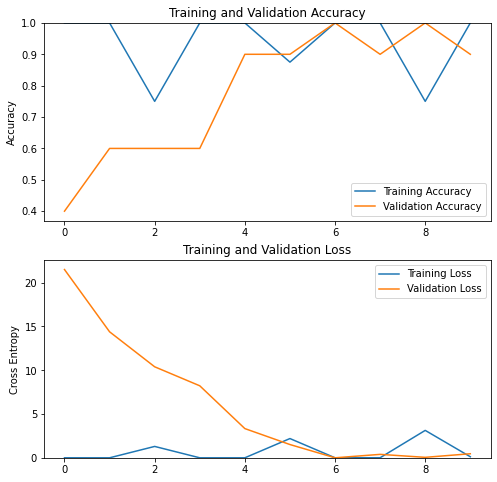

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [22]:
s=0
k=0
for i in val_acc:
    s=s+i
    k=k+1
print(val_acc)
print((s/k)*100)

[0.4000000059604645, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.8999999761581421, 0.8999999761581421, 1.0, 0.8999999761581421, 1.0, 0.8999999761581421]
77.99999982118607


In [26]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
pred_dir='Test'

test_generator = test_datagen.flow_from_directory(
    directory=pred_dir,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 2 images belonging to 2 classes.


In [27]:
test_generator.reset()

In [28]:
pred=model.predict_generator(test_generator,verbose=1,steps=1)

Instructions for updating:
Please use Model.predict, which supports generators.
1/1 [==============================] - 0s 3ms/step


In [29]:
pred.shape

(2, 2)

In [30]:
predicted_class_indices=np.argmax(pred,axis=1)

In [31]:
predicted_class_indices

array([0, 0], dtype=int64)

In [32]:
labels = (train_generator.class_indices)
#print(labels)
labels = dict((v,k) for k,v in labels.items())
print(labels)
predictions = [labels[k] for k in predicted_class_indices]

{0: 'bad fertility', 1: 'good fertility'}


In [33]:
print(predictions)

['bad fertility', 'bad fertility']


In [35]:
# import random
# if(predictions[0]=='bad fertility'):
#     print("Soil moisture: ",random.uniform(10.5,50))
# elif(predictions[0]=='good fertility'):
#     print("Soil mositure: ",random.uniform(60,100.5))

In [ ]:
from tqdm import tqdm
import os
import cv2
TRAIN_DIR=r'D:\Downloads\Hand writing\Downloads\Soil'
td=[]
import numpy as np
for img in tqdm(os.listdir(TRAIN_DIR)):
    path=os.path.join(TRAIN_DIR, img)
    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(224,224))
    td.append(np.array(img))
td=tf.keras.utils.normalize(td, axis=1)

In [ ]:
import matplotlib.pyplot as plt
for i in range(0,len(td)):
    d=td[i]
    fig = plt.figure()
    fig.suptitle(predictions[i], fontsize=14, fontweight='bold')
    plt.imshow(d)